## IRIS FLOWER CLASSIFICATION

### Brief description of the data set and a summary of its attributes

Letâ€™s assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris, which are:
- the length and width of the petals
- the length and width of the sepals, all measured in centimetres.

She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species setosa, versicolor, or virginica. For these measurements, she can be certain of which species each iris belongs to. We will consider that these are the only species our botanist will encounter.
The goal is to create a machine learning model that can learn from the measurements of these irises whose species are already known, so that we can predict the species for the new irises that she has found.

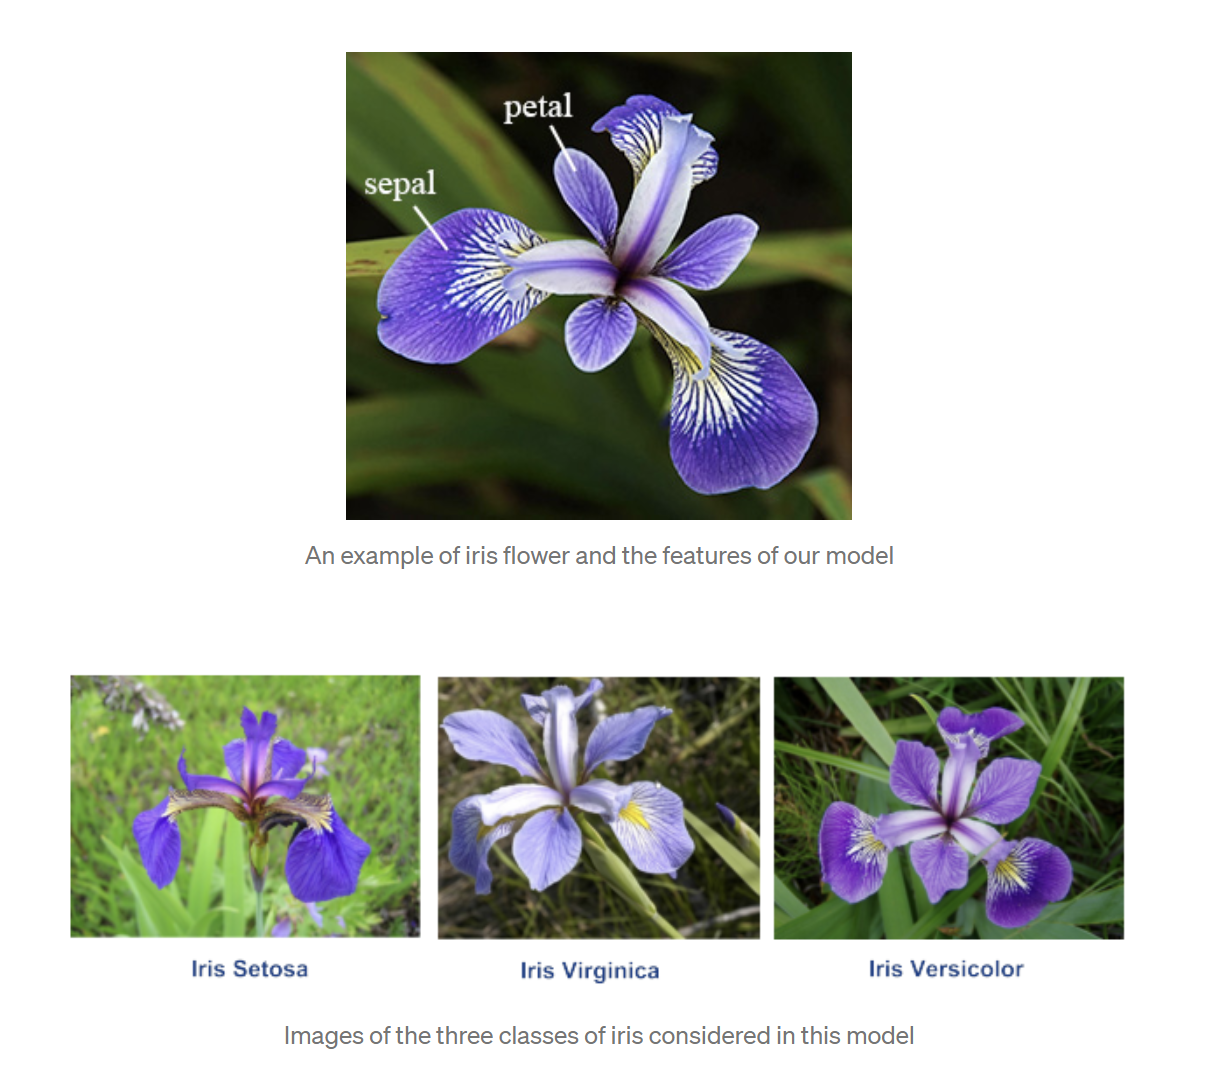


#### Attributes of Iris Dataset

In [1]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print("Target names: {}".format(iris_dataset['target_names']))
print("Feature names: {}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))


print("Shape of data: {}".format(iris_dataset['data'].shape))

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


A total of 150 rows and 4 columns has been found in this dataset.

As you can see, we have 3 targets [setosa, versicolor, virginica]

And we have 4 columns/features, [sepal length; sepal width; petal length; petal width]

### Initial plan for data exploration

- Check for any outliers
- Treat missing values
- Find the relation between sepal-length and sepal-width
- Find the relation between petal-length and petal-width

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# using local iris dataset
import pandas as pd

df = pd.read_csv("data/iris.csv")

In [3]:
# setosa, virginica, versicolor
df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

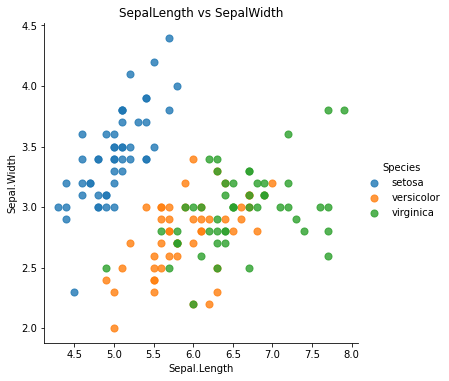

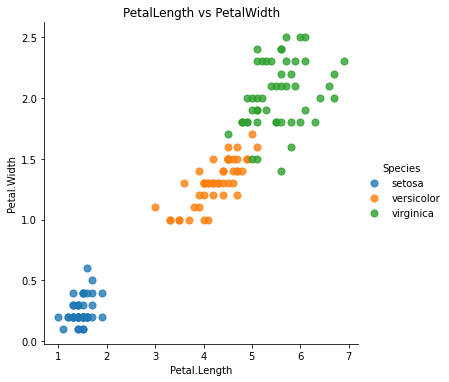

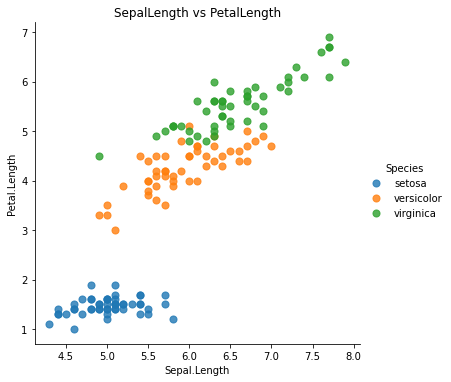

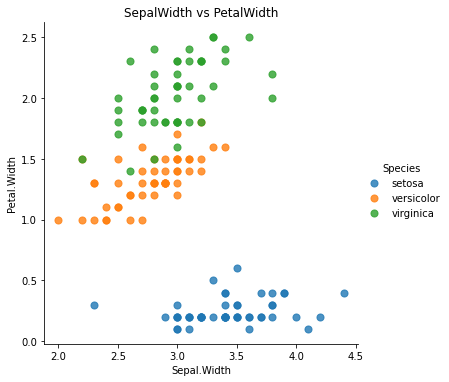

In [4]:
sns.lmplot('Sepal.Length', 'Sepal.Width',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('Petal.Length', 'Petal.Width',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('Sepal.Length', 'Petal.Length',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('Sepal.Width', 'Petal.Width',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

### Actions taken for data cleaning and feature engineering and result

- No outliers were found during exploration.
- No missing values were found.
- However, from 150 rows, only 20% will be used for testing. This could be solved by either increasing the data or by using a different validation approach.

In [5]:
df.head()

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           5.0          3.6           1.4          0.2  setosa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000

### Model using - KNN, Logistic Regression, Discriminant Analysis, Naive Bayes, SVM and comparing the performance

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
array = df.values
array

array([[1, 5.1, 3.5, 1.4, 0.2, 'setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'setosa'],
       [22, 5.1, 3.7, 1.5, 0.4, 'setosa'],
       [23, 4.6, 3.6, 1.0, 0.2, 'setosa'],
       [24, 5.1, 3.3

In [10]:
X = array[:, 1:5]  # input
y = array[:, 5]  # output

In [11]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 20%

In [12]:
X_train.shape  # training input

(120, 4)

In [13]:
X_test.shape  # testing input

(30, 4)

In [14]:
#BUILDING
models = []
#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#Linear Discriminant Analysis
models.append(('LDA', LinearDiscriminantAnalysis()))
#K-Nearest neighbors
models.append(('KNN', KNeighborsClassifier()))
#Gaussian Naive Bayes
models.append(('NB', GaussianNB()))
#Support Vector Machines
models.append(('SVM', SVC(gamma='auto')))

In [15]:
#Evaluate
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print('%s: %f' % (name, acc))

LR: 0.833333
LDA: 1.000000
KNN: 1.000000
NB: 0.966667
SVM: 0.966667


As you can see, we got a 100% prediction accuracy from Linear Discriminant Analysis as well as K Nearest Neighbours. 

But why did the remaining algorithms fail. This could be because we had insufficient data. So collecting more data on iris species might solve the problem.

This dataset was taken from sklearn datasets and [Dataset](https://drive.google.com/file/d/1lmkJ6DKK6dONYTQNuJc1sEsCaVtgpOn_/view)

The dataset had 150 rows and 4 columns.(5 in the csv file as it had the target values as well).

We analyzed the relation between the variables using Seaborn plots.

There were no outliers or missing values to be found in this dataset. But however, the only reason some of the models showed poor performance could be because of insufficiency of data. Therefore, this dataset is in need for additional data.